# Nie bądź jak Sułtan kosmitów

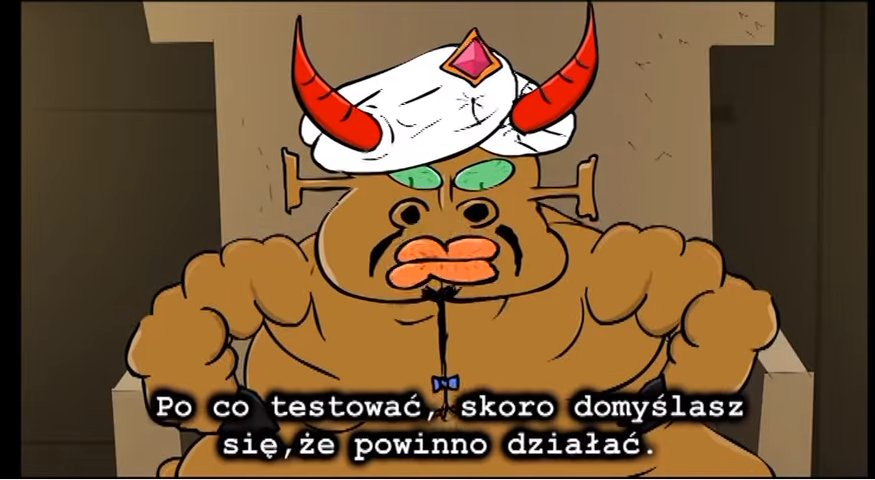

##  testy jednostkowe, tdd, unittest, pytest
### Mateusz Leszczyński

# Testowanie kodu

## Co to jest testowanie?
- uruchamianie kodu naszego programu w celu sprawdzenia, czy robi to, co powinien



### Program testing can be used to show the presence of bugs, but never to show their absence!
Edsker D. Dijkstra (1970)

## Testy automatyczne 
- dodatkowe fragmenty programu, które uruchamiają nasz główny kod, a następnie porównują wyniki z oczekiwaniami
- są szybkie do uruchomienia
- są powtarzalne
- wszyscy z zespołu są w stanie powtórzyć test

## Dlaczego testujemy
- testowanie pozwala upewnić się, że w wybranych przez nas warunkach wszystko działa tak jak chcemy
- zmniejsza strach przed zmianami
- łatwiejsze niż debugowanie!

# Test Driven Development (TDD)
1. napisać nieprzechodzący test
2. zmienić kod w najłatwiejszy możliwy sposób żeby test przeszedł
3. zrobić refactor

## Podstawowe testy jednostkowe w czystym python

### Zadanie z `assert`
Napisać funkcję __flatten__, która dostaję listę zagnieżdżonych list i zwraca je jako listę na jednym poziomie.

np. flatten([1, 2, 3, [4, 5]]) == [1, 2, 3, 4, 5]

In [7]:
assert flatten([1, 2, 3]) == [1, 2, 3]

NameError: name 'flatten' is not defined

In [8]:
assert flatten([]) == []

NameError: name 'flatten' is not defined

In [9]:
assert flatten([1, [2, 3], 4]) == [1, 2, 3, 4]

NameError: name 'flatten' is not defined

In [10]:
assert flatten([1, [2, 3], 4]) != [1, [2, 3], 4]

NameError: name 'flatten' is not defined

In [11]:
assert flatten([[1, 2, [3, 4, 5], [6], 7, 8], 9]) == [1, 2, 3, 4, 5, 6, 7, 8, 9]

NameError: name 'flatten' is not defined

In [12]:
def flatten(element):
    return list(flatten_gen(element))

In [13]:
def flatten_gen(element):
    for e in element:
        if isinstance(e, list):
            for e_elem in flatten_gen(e):
                yield e_elem
        else:
            yield e

In [14]:
assert flatten([1, 2, 3]) == [1, 2, 3]
assert flatten([1, [2, 3], 4]) == [1, 2, 3, 4]
assert flatten([]) == []
assert flatten([[1, 2, [3, 4, 5], [6], 7, 8], 9]) == [1, 2, 3, 4, 5, 6, 7, 8, 9]
assert flatten([1, [2, 3], 4]) != [1, [2, 3], 4]

In [15]:
assert flatten([1, [2, 3], 4]) == [1, [2, 3], 4]

AssertionError: 

## Assert
- `assert` jest częścią składni pythona nie funkcją
- jego działanie zwraca None jeśli wynik operacji poprzedzony assertem rzutuje na prawdę logiczną.
- jeśli wynik operacji po assercie jest Fałszem, rzucany jest wyjątek `AssertionError`
- nie zaleca się umieszczać assertów w kodzie programu a jedynie w testach
- można globalnie wyłączyć dla projektu w trakcie działania zdolność asserów do rzucania wyjątkiem:
 - `python -O <file.py>` włącza __basic optimizations__.
 - `python -OO <file.py>` dodtkowo ucinka Doc Stringi dla szybszego przetwarzania i minimalizacji rozmiaru bytecodu.

# Jeden poziom wyżej dla pythonowych testów: `unittest`

## Unittest
- Umieszczony w bibliotece standardowej `python` nie wymaga żadnych dodatkowych zależności
- Można tworzyć pełne scenariusze testowe
- Można organizować kod testów w klasy
- Rozbudowane opcje różnych asercji

### Przykład wykonania prostych funkcji testów

In [16]:
def test_flatten_not_nested_list():
    test_list = [1, 2, 3]
    result = flatten(test_list)
    assert result == [1, 2, 3]

In [17]:
def test_flatten_nested_list():
    test_list = [1, [2, 3], 4]
    result = flatten(test_list)
    assert result == [1, 2, 3, 4]

In [18]:
def test_flatten_empty_list():
    test_list = []
    result = flatten(test_list)
    assert result == []

In [27]:
def test_flatten_different_nestings():
    test_list = [[1, 2, [3, 4, 5], [6], 7, 8], 9]
    result = flatten(test_list)
    assert result == [1, 2, 3, 4, 5, 6, 7, 8, 9]

### Przykład opakowania przykładowego pliku z testami

In [20]:
import unittest

class Tests(unittest.TestCase):
    """Main Test class."""

    def test_flatten_not_nested_list(self):
        test_list = [1, 2, 3]
        result = flatten(test_list)
        assert result == [1, 2, 3]
        
    def test_flatten_proper_input(self):
        test_list = 1
        with self.assertRaises(TypeError):
            result = flatten(test_list)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


# Kolejny poziom wyżej dla pythonowych testów zautomatyzowanych:  `pytest`

__Pytest__ jest dodatkowym pakietem Python który możemy zainstalować z PyPI
1. Tworzymy nowy virtualenv
2. Aktywujemy go
3. Instalujemy z __pytest__

Tworzymy nowe środowisko z `venv` od razu instalując `pytest`: 
```
mkdir testing_project && cd testing_project
mkdir .venv && python3 -m venv --prompt testing_project .venv
source .venv/bin/activate
pip install pytest
```

__`pytest`__: Framework do testowania:
- ułatwia pisanie i organizację testów
- daje narzędzie do odpalania i wyszukiwania testów
- wyświetla wyniki w ładnej formie

http://pythontesting.net/framework/pytest/pytest-introduction/

Tak przygotowane testy możemy uruchomić komendą:
```
pytest
```

Samo wywołanie `pytest` uruchomi wszystkie testy w projekcie.
Można też wykonać konkretny plik z testami:
```
python -m pytest test_pytest.py
pytest test_pytest.py
```

- Pytest posiada bardzo rozbudowane możliwości asercji, fixtur i innych przydatnych narzędzi
- Pytest uruchomi też testy napisane w Unittest. Wystarczy podać nazwę pliku lub jeśli plik zaczyna się od słowa `test` pytest sam znajdzie i uruchomi wszystkie testy.

In [21]:
%load_ext ipython_pytest

In [ ]:
def flatten(element):
    return list(flatten_gen(element))
def flatten_gen(element):
    for e in element:
        if isinstance(e, list):
            for e_elem in flatten_gen(e):
                yield e_elem
        else:
            yield e

In [26]:
%%pytest --ignore=warning
import pytest

@pytest.mark.parametrize(
    "param, result",
    [
        [[1, 2, 3], [1, 2, 3]],
        [[1, [2, 3], 4], [1, 2, 3, 4]],
        [[], []],
        [[[1, 2, [3, 4, 5], [6], 7, 8], 9], [1, 2, 3, 4, 5, 6, 7, 8, 9]]
    ],
)
def test_value_comparator(param: list, result: list):
    assert flatten(param) == result

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /tmp/tmpb_fr102a
collected 4 items

_ipytesttmp.py ....                                                      [100%]

============================== 4 passed in 0.03s ===============================


# Metodologia testowania

## Podejście do testowania projektu
- Tak dużo jak jest projektów tak dużo i podejść do testowania.
- W pythonie zazwyczaj piszemy 2 typy testów:
    - jednostkowe
    - integracyjne
- Wyróżniamy jeszcze testy:
    - systemowe
    - akceptacyjne

### Testy __jednostkowe__
- zwane też modułowymi
- testują funkcjonalność pojedynczych metod, klas, modułów
- w projekcie jest ich zazwyczaj najwięcej

### Testy __integracyjne__
- testują zależności pomiędzy modułami
- wprowadzają scenariusz testów który w ramach jednego testu integracyjnego uruchamia wiele testów jednostkowych
- testują konkretne przypadki użycia programu
- w projekcie jest ich zazwyczaj znacznie mniej niż testów jednostkowych

### Testy __systemowe__ oraz __akceptacyjne__
- testy systemowe
    - mają na celu sprawdzenie działania programu w danym środowisku
    - sprawdzają poprawność działania w danej architekturze (też i wirtualnej)


- testy akceptacyjne
    - raczej testy nie automatyczne
    - sprawdzają poziom satysfakcji z działania programu
    - sprawdzają konkretne przypadki użycia
   

# Dobre testy
- szybkie
- zautomatyzowane
- przewidywalne
- dające dobrą informację zwrotną
- skupiające się na jednym aspekcie na raz
- dobrze izolowane
- przemyślane i zadbane

## Izolacja testów
- testy nie powinny mieć wpływu na siebie nawzajem
- błąd w jednym teście nie przerywa wykonania testów
- każdy test powinien przejść zarówno uruchomiony pojedynczo jak i w grupie
- testy powinny być na tyle izolowane że mogą przejść w dowolnej kolejności

## Więcej niż testowanie działania programu
- Flake8: Sprawdza poprawność pisowni ze standardem PEP8 i innymi standardowymi guidelineami.
- mypy: Analizuje typy danych w kodzie nie uruchamiając go. Potrafi wykryć potencjalne błędy.
- isort: Sprawdza poprawność sortowania importów z modułów w naszym kodzie
- black: Automatyczny linter który w jednoznaczy sposób wyznacza sposób pisowni, deterministyczny i bardzo przydatny w pracy zespołowej.

# Mockowanie

## Mock
- zachowuje się jak dowolny obiekt
- zapisuje co się z nim dzieje (jakie akcje sę na nim wykonywane itp)
- można na nim później wywołać assert
- łatwiej popsuć testy, bo polegamy na dokładnej implementacji danego kawałka
- używamy z `with` ! źle wykonane mokowanie które zmienia wbudowany moduł może rzutować na zachowanie całego projektu


https://docs.python.org/3/library/unittest.mock.html

### Przed mockowaniem

In [3]:
import random
from unittest.mock import patch

In [4]:
for i in range(3):
    print(random.random())

0.13896297095004928
0.674653100003141
0.40391874806419303


### Zamockowany random

In [5]:
with patch('random.random') as mock_random:
    print('')
    mock_random.return_value = 0.05
    for i in range(3):
        print(random.random())


0.05
0.05
0.05


### Po mockowaniu

In [6]:
for i in range(3):
    print(random.random())

0.336745481018237
0.9121033173717616
0.8659162009562827


# Debugowanie - jak sobie z tym radzić
- najprostszy sposób - wstawianie printów do kodu
- lepszy sposób - użycie interaktywnego debuggera

Debugger jest dostępny w bibliotece standardowej:

https://docs.python.org/3.8/library/pdb.html

https://github.com/nblock/pdb-cheatsheet

In [ ]:
def test_function():
    ...
    import pdb;pdb.set_trace()

In [ ]:
def test_function():
    ...
    breakpoint()

- `pdb` można importować dosłownie wszędzie, nie musi być to konkretny testcase
- na `breakpoint` wykonanie programu zostaje wstrzymane i czeka na interakcję ze strony użytkownika
- dla `pdb` powstało wiele alternatyw, warto skorzystać np z `ipdb`, biblioteki spokrewnionej z `ipython`. Ma tę samą składnie ale dodatkowo koloruje output i poprawia nawigację po kodzie w trakcie debugowania.
- UWAGA! zawsze usuwać brakepointy przed commitowaniem kodu do repozytorium !!
- Warto napisać Githook który wykrywa użycie PDB w kodzie i uniemożliwia commitowanie kodu

# Materiały do samodzielnej nauki po zakończeniu kursu:
- https://hakibenita.com/python-dependency-injection
- https://realpython.com/pytest-python-testing/


# Dziękuję